<a href="https://colab.research.google.com/github/rcardocg/11B/blob/master/Breast_Cancer_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparations

## Workframe Setup

In [25]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Kaggle setup
import kagglehub

## Dataset Preparations

In [26]:
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [27]:
raw_data = pd.read_csv(path + '/data.csv')
raw_data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [28]:
raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [29]:
# Drop the trash column
raw_data = raw_data.drop(columns=['Unnamed: 32'])
raw_data.shape

(569, 32)

In [30]:
# Drop Nulls
print(raw_data.isnull().sum())
raw_data = raw_data.dropna()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [31]:
raw_data.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


### Encoding

In [32]:
# prompt: Function to map values in the diagnosis column to an int (M = 0, B = 1)

def map_diagnosis(diagnosis):
    if diagnosis == 'M':
        return 0
    elif diagnosis == 'B':
        return 1
    else:
        return -1 # Handle cases where diagnosis is neither 'M' nor 'B'


raw_data['diagnosis'] = raw_data['diagnosis'].apply(map_diagnosis)


In [33]:
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Oversampling

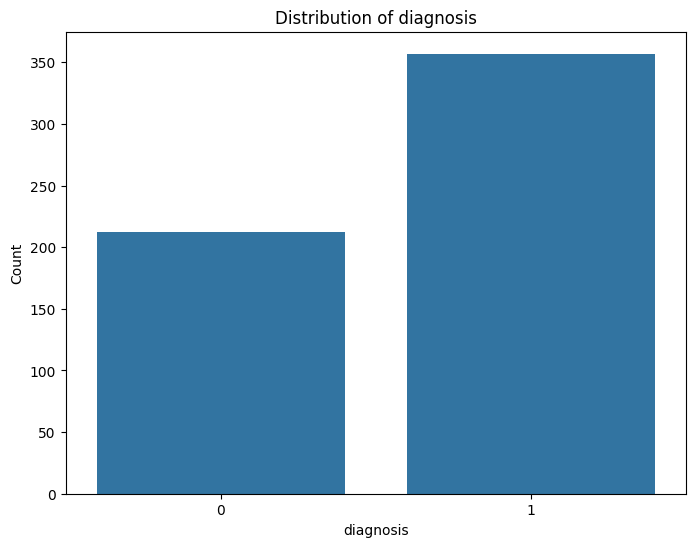

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=raw_data)
plt.title('Distribution of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

In [35]:
# Lets extract how many classes there ar in class 0
class_one_count = raw_data['diagnosis'].value_counts()[1]
class_one_count

# Oversample the data that belongs to class '0' (M)
oversampled_class_zero = raw_data[raw_data['diagnosis'] == 0].sample(class_one_count, replace=True)

oversampled_class_zero

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
339,89812,0,23.51,24.27,155.10,1747.0,0.1069,0.1283,0.2308,0.14100,...,30.67,30.73,202.40,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
328,8953902,0,16.27,20.71,106.90,813.7,0.1169,0.1319,0.1478,0.08488,...,19.28,30.38,129.80,1121.0,0.1590,0.2947,0.3597,0.1583,0.3103,0.08200
34,854039,0,16.13,17.88,107.00,807.2,0.1040,0.1559,0.1354,0.07752,...,20.21,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.1864,0.4270,0.12330
379,9013838,0,11.08,18.83,73.30,361.6,0.1216,0.2154,0.1689,0.06367,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.14030
4,84358402,0,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,858986,0,14.25,22.15,96.42,645.7,0.1049,0.2008,0.2135,0.08653,...,17.67,29.51,119.10,959.5,0.1640,0.6247,0.6922,0.1785,0.2844,0.11320
564,926424,0,21.56,22.39,142.00,1479.0,0.1110,0.1159,0.2439,0.13890,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
17,84862001,0,16.13,20.68,108.10,798.8,0.1170,0.2022,0.1722,0.10280,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420
4,84358402,0,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


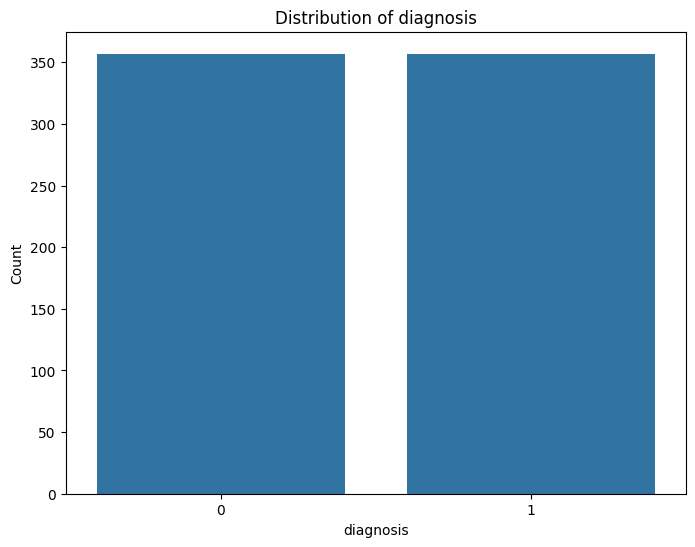

In [36]:
# Extract all the data with class 1
class_one_data = raw_data[raw_data['diagnosis'] == 1]

# Merge datasets
oversampled_dataset = pd.concat([oversampled_class_zero, class_one_data])

# Suffle the dataset
oversampled_dataset = oversampled_dataset.sample(frac=1).reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=oversampled_dataset)
plt.title('Distribution of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

## Normalization

In [37]:
def normalize_columns(df, columns_to_normalize):
    """Normalizes specified columns in a Pandas DataFrame.

    Args:
      df: The input DataFrame.
      columns_to_normalize: A list of column names to normalize.

    Returns:
      A new DataFrame with the specified columns normalized.
    """

    # Create a copy to avoid modifying the original DataFrame
    normalized_df = df.copy()

    for column in columns_to_normalize:
        if column in normalized_df.columns:
            min_val = normalized_df[column].min()
            max_val = normalized_df[column].max()
            normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
        else:
            print(f"Warning: Column '{column}' not found in DataFrame.")

    return normalized_df
dataset_normalized = normalize_columns(oversampled_dataset, ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])
dataset_normalized

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,907367,1,0.144304,0.391275,0.134061,0.069480,0.257651,0.060548,0.005787,0.025641,...,0.113127,0.450959,0.097166,0.046967,0.273592,0.042349,0.009864,0.088625,0.154544,0.167716
1,911391,1,0.184533,0.199865,0.183954,0.091368,0.433962,0.268450,0.119845,0.078082,...,0.142654,0.195362,0.151253,0.060927,0.409628,0.351709,0.268770,0.273746,0.200276,0.347370
2,8610404,0,0.430167,0.336152,0.416765,0.285981,0.352532,0.198945,0.228889,0.329920,...,0.421202,0.334222,0.390408,0.255063,0.520571,0.171930,0.225958,0.522337,0.213877,0.057917
3,887181,0,0.410762,0.456206,0.458918,0.267232,0.526045,0.895712,0.744142,0.684394,...,0.424048,0.522921,0.464615,0.255800,0.523212,0.475313,0.493690,0.846048,0.337473,0.307359
4,84799002,0,0.357755,0.602976,0.365835,0.218579,0.553128,0.429790,0.384021,0.366004,...,0.339025,0.669243,0.367000,0.186296,0.638117,0.611627,0.561182,0.588316,0.522965,0.518562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,895100,0,0.632259,0.399053,0.636514,0.475292,0.581114,0.515674,0.600984,0.747515,...,0.617930,0.528785,0.601076,0.430790,0.581325,0.409339,0.426837,0.922680,0.787108,0.310639
710,855133,0,0.379052,0.523842,0.357612,0.235546,0.372303,0.097939,0.056186,0.144085,...,0.251156,0.351279,0.224762,0.126229,0.149904,0.023304,0.019153,0.099622,0.000000,0.000000
711,8611161,1,0.300961,0.207981,0.295073,0.159703,0.498059,0.411386,0.273899,0.347266,...,0.270366,0.297708,0.230340,0.105609,0.544344,0.438348,0.388019,0.586942,0.386753,0.305392
712,894329,1,0.097544,0.310788,0.112501,0.042842,0.424754,0.545427,0.462746,0.243936,...,0.075774,0.303305,0.090692,0.027502,0.336327,0.337156,0.368131,0.393471,0.309482,0.330972


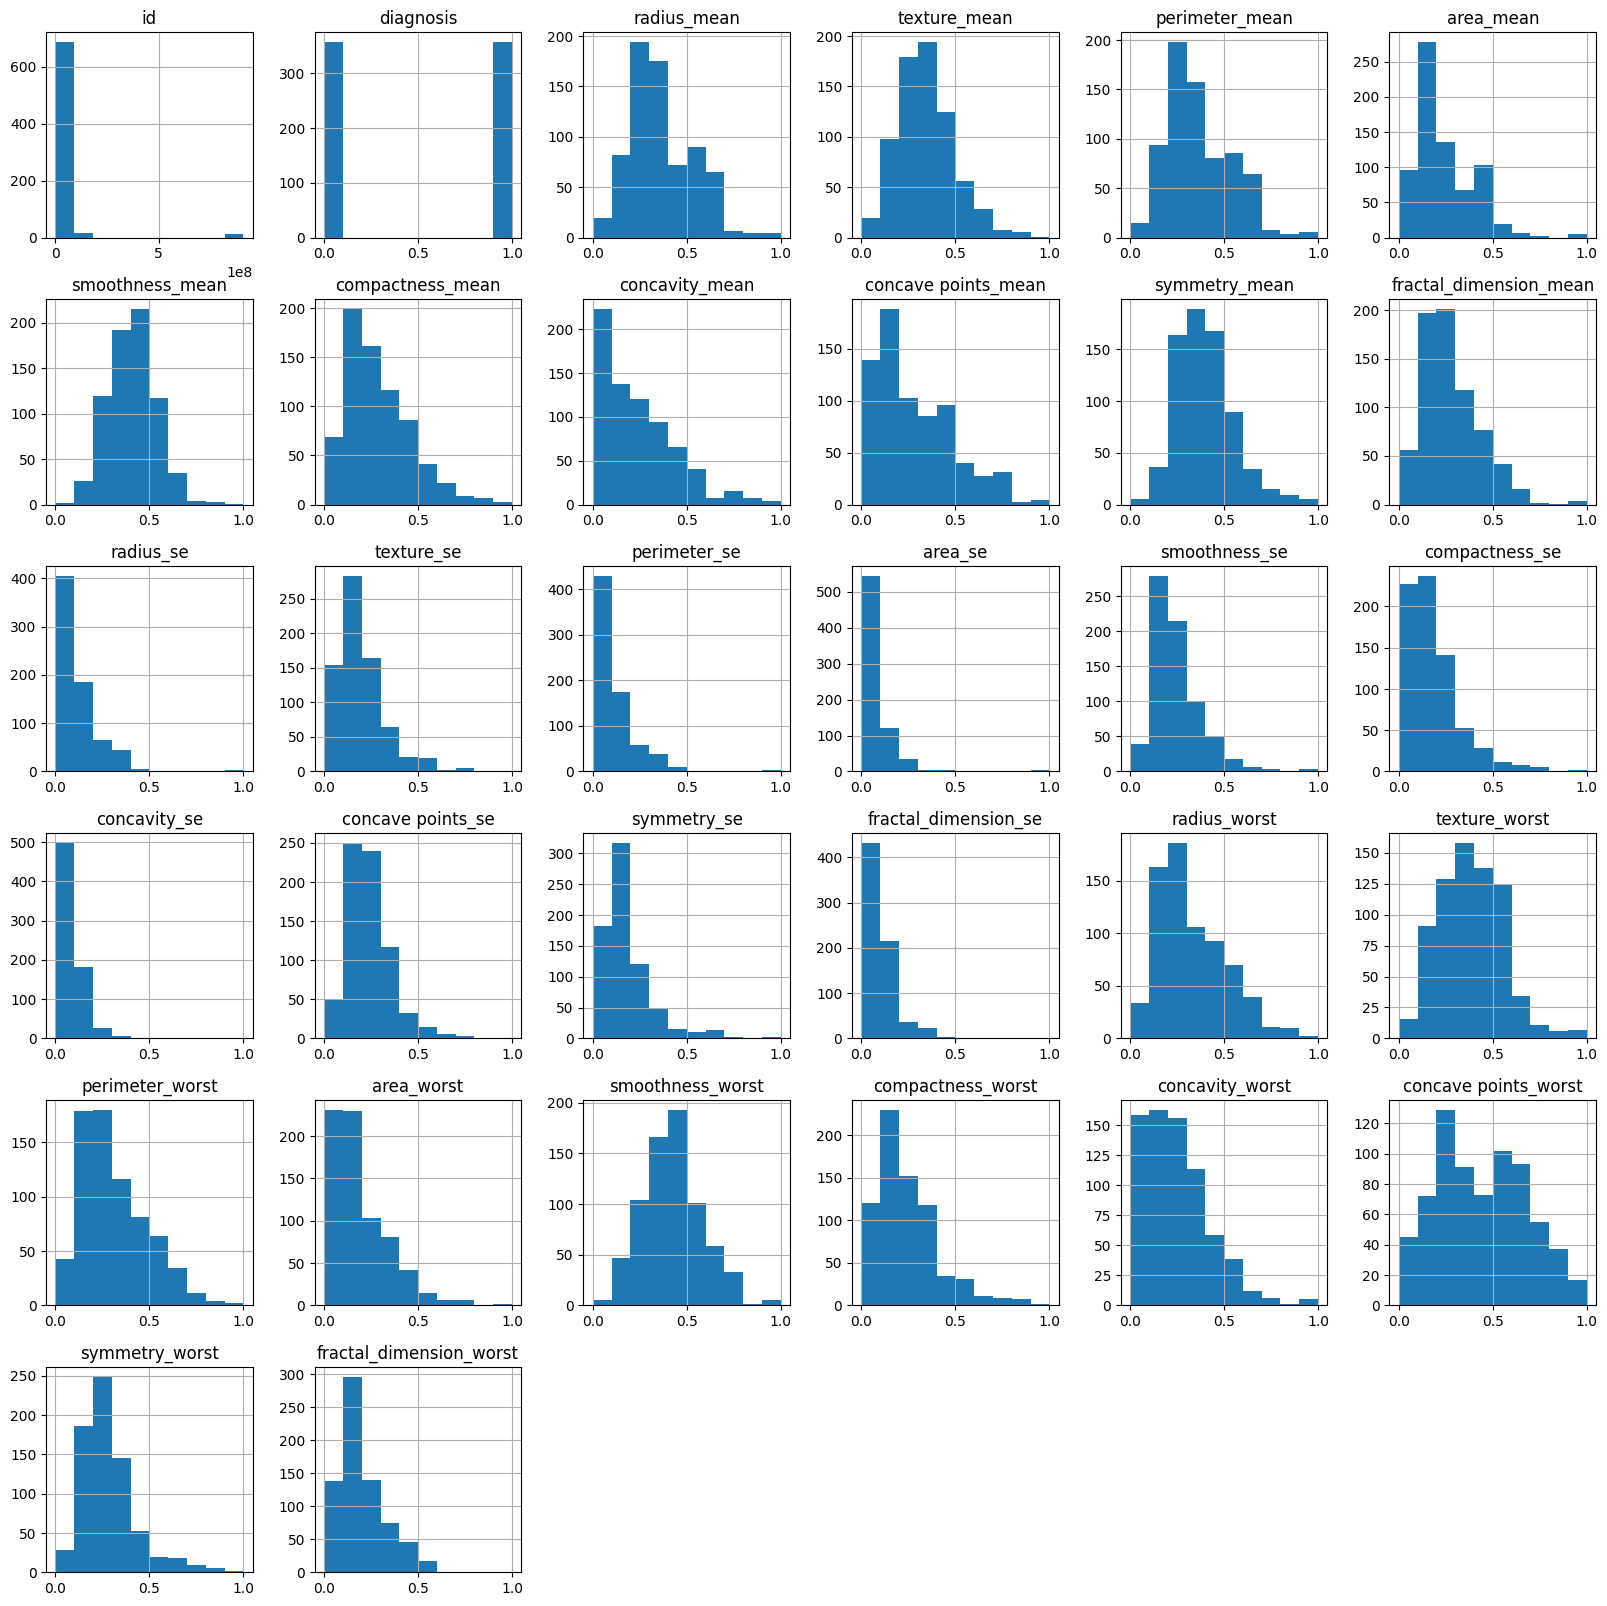

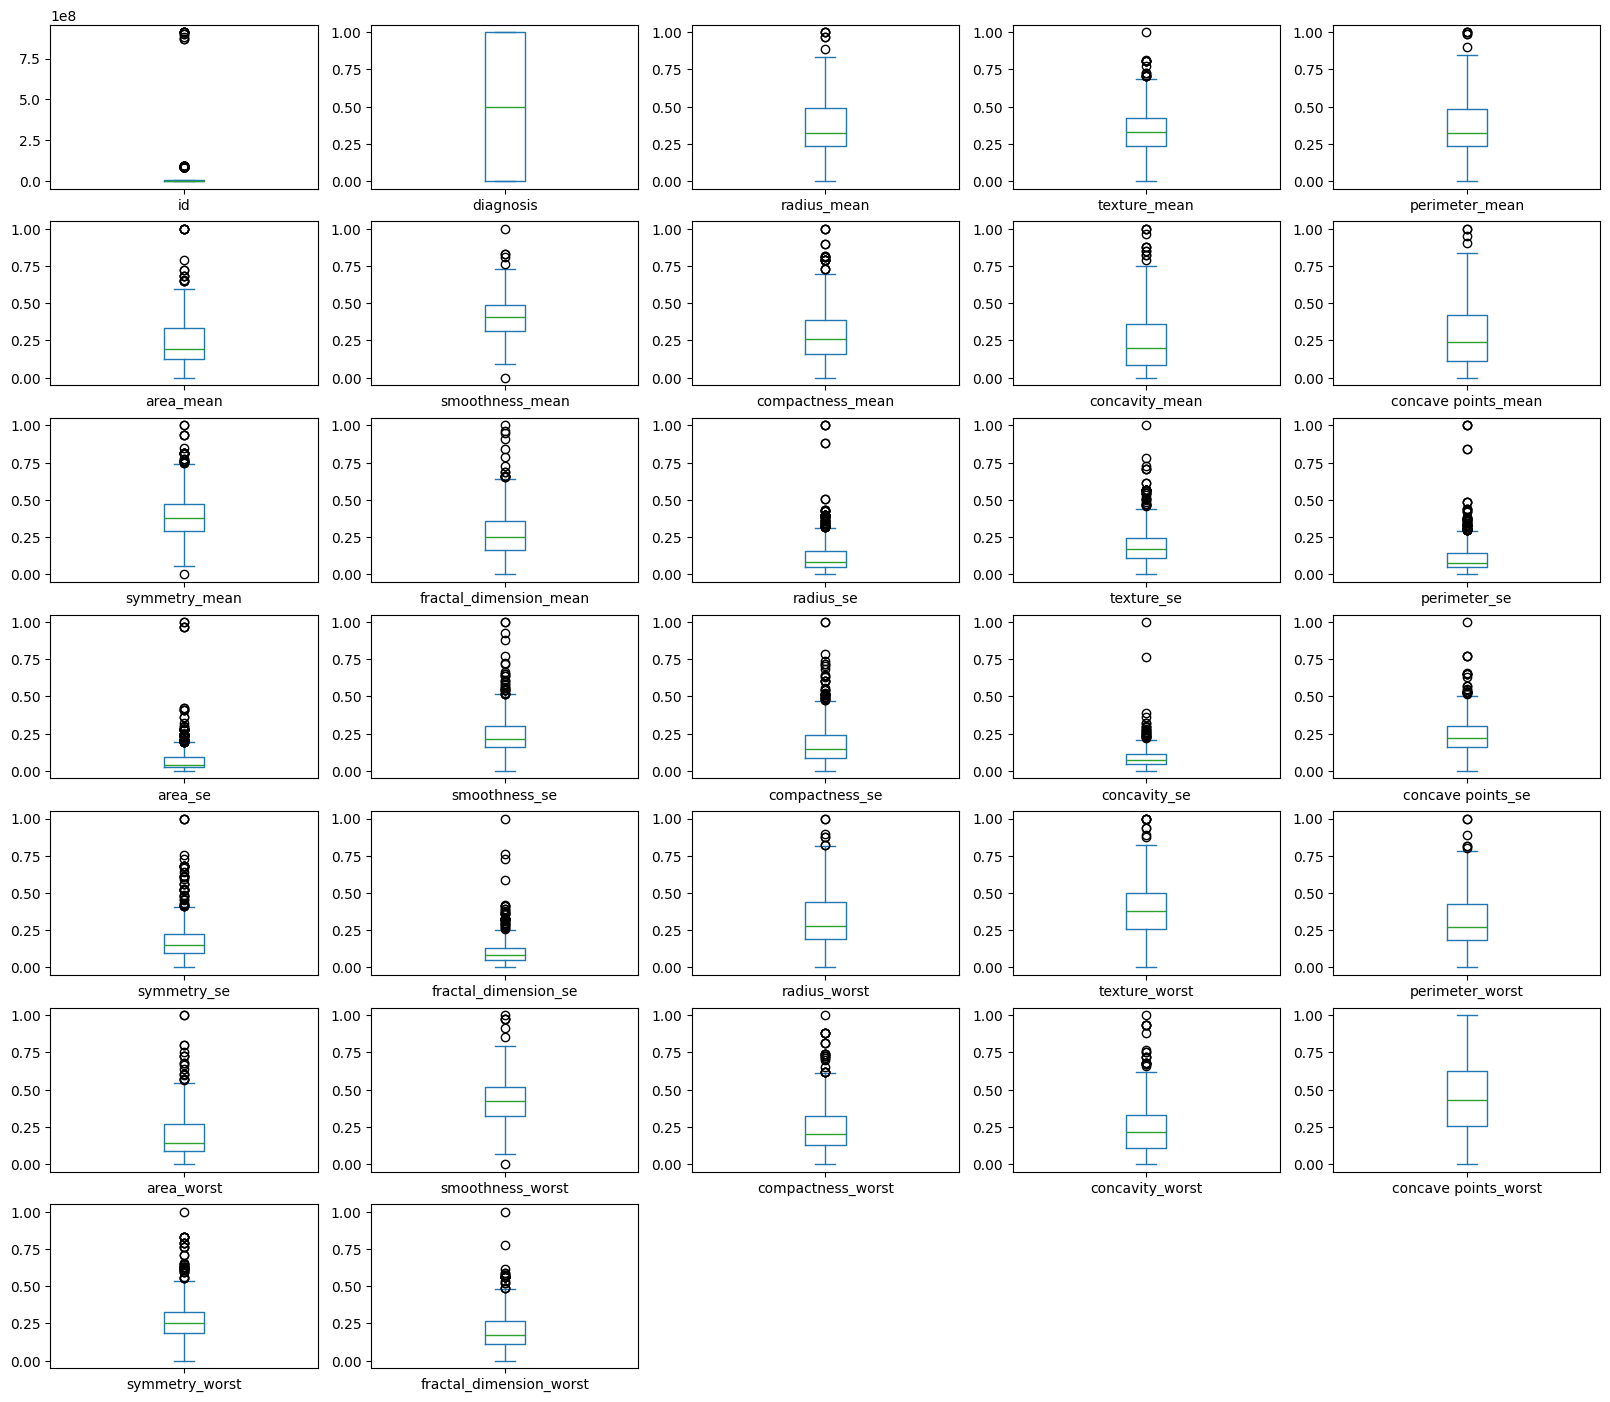

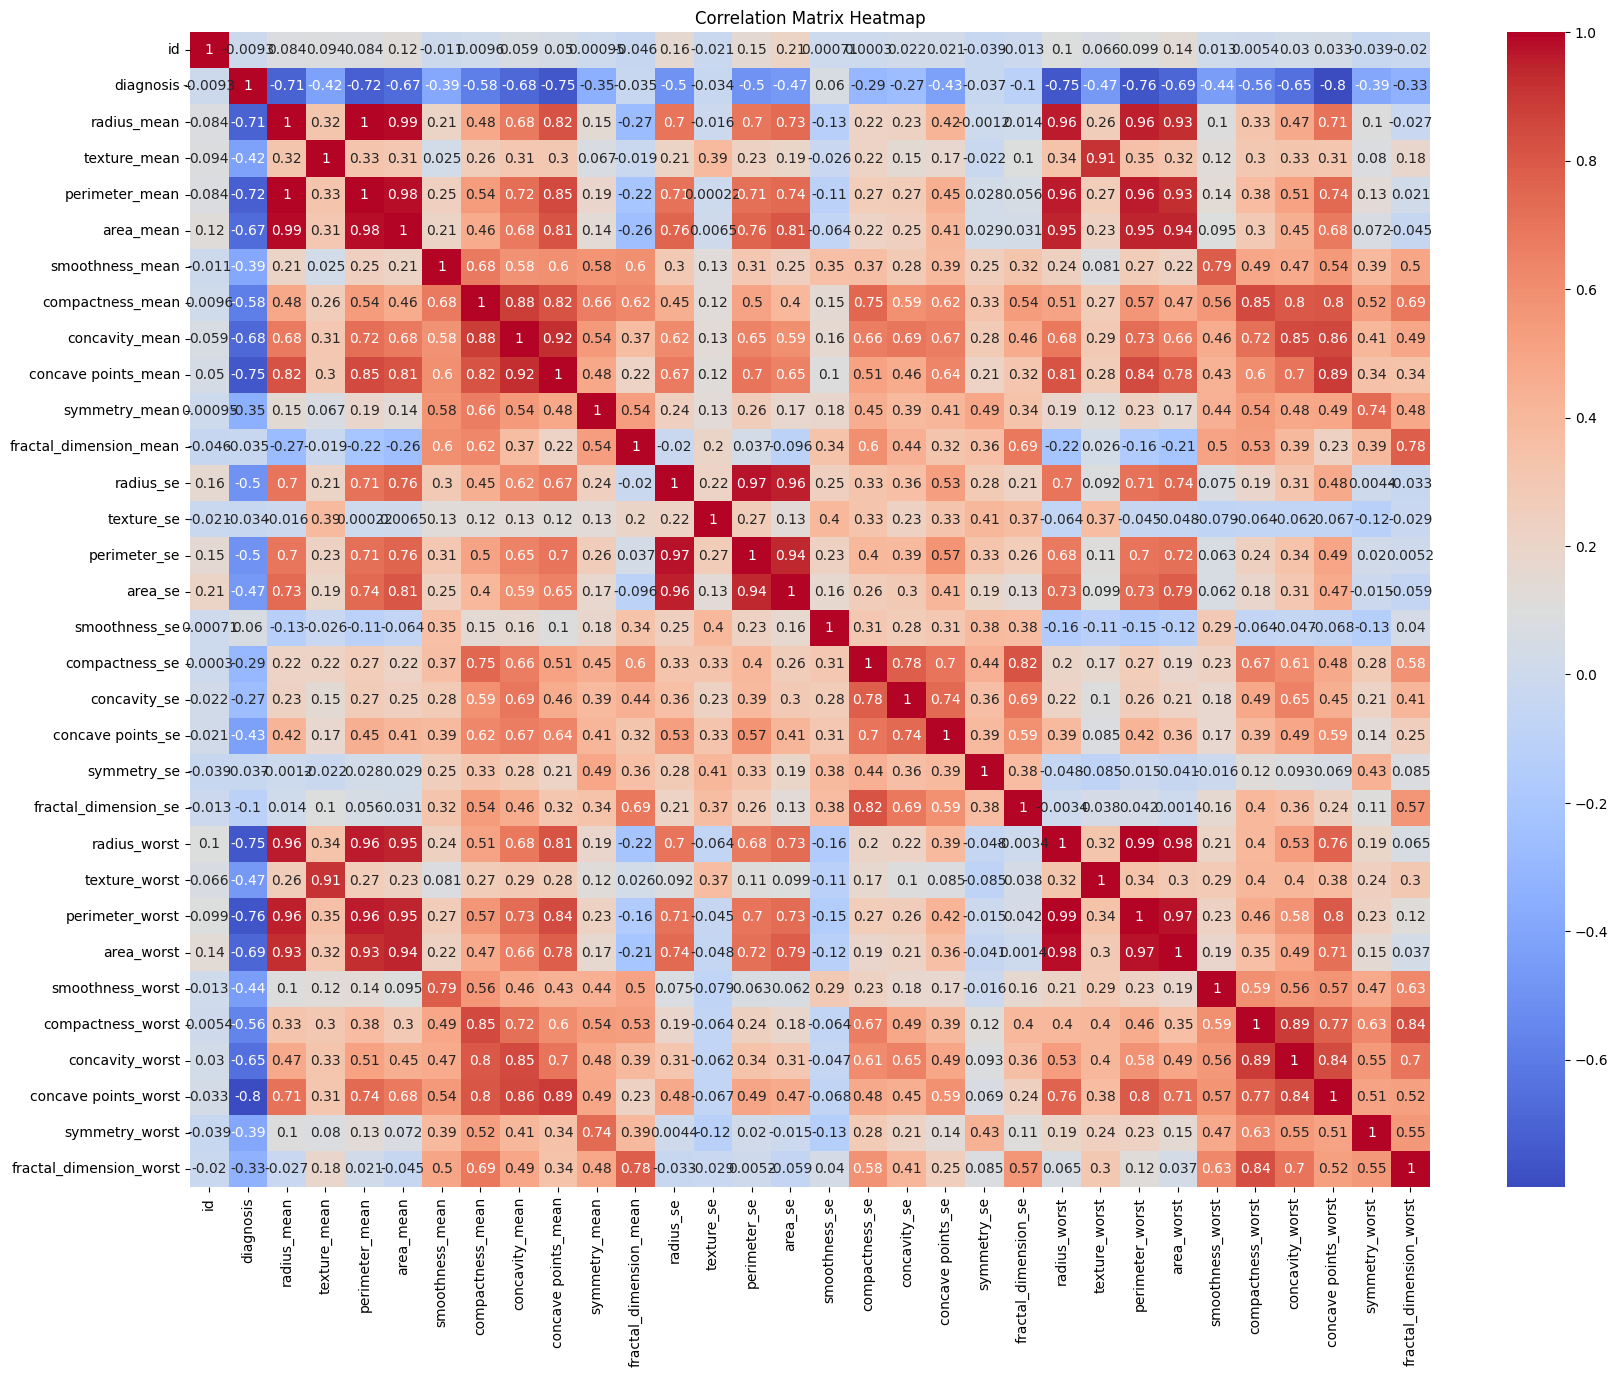

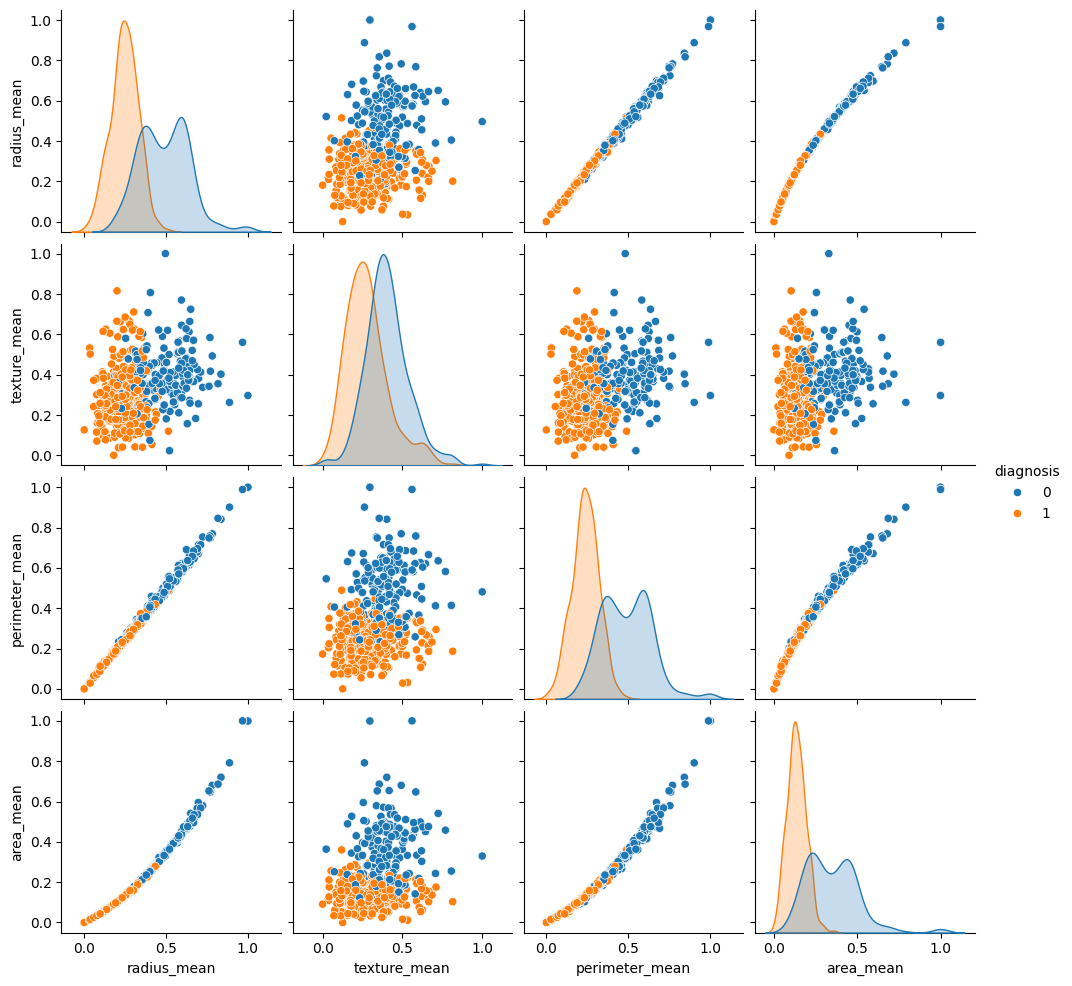

In [38]:
# Create histograms for each numerical feature
dataset_normalized.hist(figsize=(20, 20))
plt.show()

# Create boxplots for each numerical feature
dataset_normalized.plot(kind='box', subplots=True, layout=(8,5), sharex=False, sharey=False, figsize=(20,20))
plt.show()

# Create a correlation matrix heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(dataset_normalized.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Pairplot for a subset of features
sns.pairplot(dataset_normalized, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()

# Models

## First model

In [39]:
# Split the dataset into features (X) and target variable (y)
X = dataset_normalized.drop(columns=['diagnosis', 'id'])
y = dataset_normalized['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [41]:
#model
modelLeaky = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='leaky_relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compiling
modelLeaky.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# training
history = modelLeaky.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
#

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7576 - loss: 0.5207 - val_accuracy: 0.4700 - val_loss: 0.6651
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8847 - loss: 0.2497 - val_accuracy: 0.4700 - val_loss: 0.6801
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9073 - loss: 0.1987 - val_accuracy: 0.4700 - val_loss: 0.6948
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9205 - loss: 0.2100 - val_accuracy: 0.4700 - val_loss: 0.6950
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9592 - loss: 0.1427 - val_accuracy: 0.4700 - val_loss: 0.7024
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9377 - loss: 0.1479 - val_accuracy: 0.4700 - val_loss: 0.6928
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9595 - loss: 0.1006 - val_accuracy: 0.4800 - val_loss: 0.6984
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9472 - loss: 0.1196 - val_accuracy: 0.4900 - val_loss: 0.6829
Ep

In [42]:
loss, accuracy = modelLeaky.evaluate(X_train, y_train, verbose=0)
print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy:.4f}")

Train Loss: 0.1362
Train Accuracy: 0.9699


In [43]:
loss, accuracy = modelLeaky.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.1242
Test Accuracy: 0.9767


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


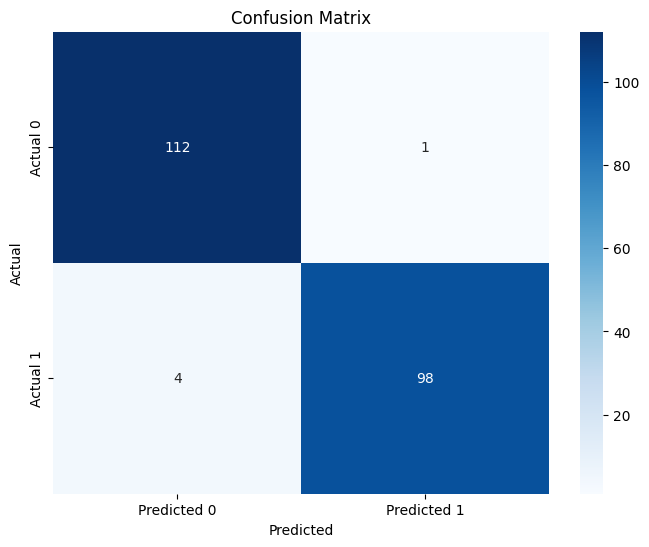

In [44]:
y_pred = modelLeaky.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Second model

In [45]:
#model
modelRelu = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compiling
modelRelu.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# training
history = modelRelu.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
#

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5672 - loss: 0.8064 - val_accuracy: 0.8100 - val_loss: 0.6507
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8345 - loss: 0.3342 - val_accuracy: 0.6600 - val_loss: 0.6254
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9336 - loss: 0.2169 - val_accuracy: 0.6700 - val_loss: 0.6078
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9395 - loss: 0.1802 - val_accuracy: 0.7100 - val_loss: 0.5882
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9630 - loss: 0.1462 - val_accuracy: 0.7100 - val_loss: 0.5647
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9325 - loss: 0.1657 - val_accuracy: 0.7200 - val_loss: 0.5475
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9612 - loss: 0.1362 - val_accuracy: 0.7400 - val_loss: 0.5234
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9625 - loss: 0.1070 - val_accuracy: 0.7200 - val_loss: 0.5161

In [46]:
loss, accuracy = modelRelu.evaluate(X_train, y_train, verbose=0)
print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy:.4f}")

Train Loss: 0.0962
Train Accuracy: 0.9820


In [47]:
loss, accuracy = modelRelu.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.1017
Test Accuracy: 0.9860


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


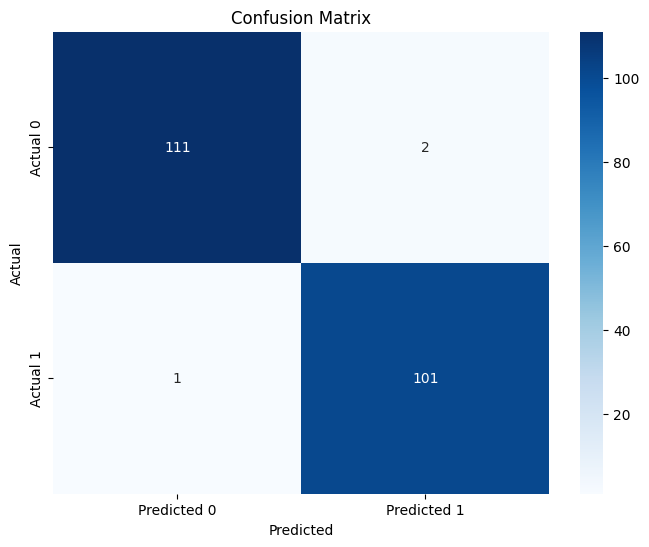

In [48]:
y_pred = modelRelu.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
